## Import Library

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
from kneed import KneeLocator

## Quantized Model Result with Different Bits

In [5]:
diff_b_sorted = pd.read_csv('../logs/Quantization_Log_Bit.csv')
diff_b_sorted

,Model Name,Dataset,Quantization Batch Size,Original Top1 Accuracy,Quantized Top1 Accuracy,Original Top5 Accuracy,Quantized Top5 Accuracy,MLP_Alphabet_Scalar,CNN_Alphabet_Scalar,MLP_Percentile,CNN_Percentile,Stochastic Quantization,Regularizer,Lambda,Original Sparsity,Quantized Sparsity,Retain_rate,Fusion,Seed
0,resnet18,CIFAR10,256,0.9259,0.4144,0.9974,0.9131,1.16,1.16,1.0,1.0,False,NaN,0.1,0.0,0.6780,0.25,False,0
1,resnet18,CIFAR10,256,0.9259,0.8773,0.9974,0.9924,1.16,1.16,1.0,1.0,False,NaN,0.1,0.0,0.7207,0.25,False,0
2,resnet18,CIFAR10,256,0.9259,0.9117,0.9974,0.9970,1.16,1.16,1.0,1.0,False,NaN,0.1,0.0,0.6624,0.25,False,0
3,resnet18,CIFAR10,256,0.9259,0.9189,0.9974,0.9968,1.16,1.16,1.0,1.0,False,NaN,0.1,0.0,0.5560,0.25,False,0
4,resnet18,CIFAR10,256,0.9259,0.9160,0.9974,0.9970,1.16,1.16,1.0,1.0,False,NaN,0.1,0.0,0.4733,0.25,False,0
5,resnet18,CIFAR10,256,0.9259,0.9180,0.9974,0.9972,1.16,1.16,1.0,1.0,False,NaN,0.1,0.0,0.4201,0.25,False,0
6,resnet18,CIFAR10,256,0.9259,0.9172,0.9974,0.9968,1.16,1.16,1.0,1.0,False,NaN,0.1,0.0,0.3895,0.25,False,0
7,resnet18,CIFAR10,256,0.9259,0.9203,0.9974,0.9968,1.16,1.16,1.0,1.0,False,NaN,0.1,0.0,0.3744,0.25,False,0


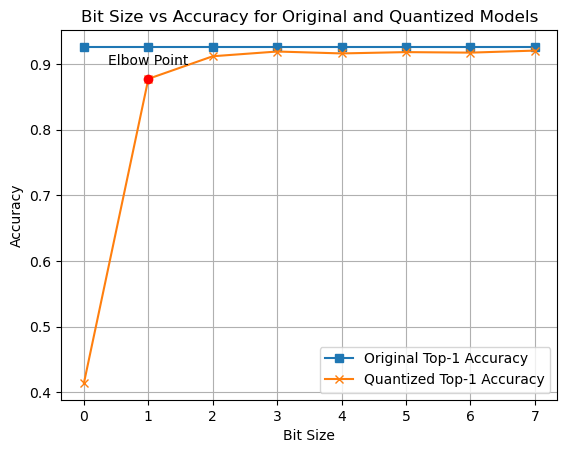

Elbow Point is at Bit Size: 1


In [9]:
# Plotting
fig, ax = plt.subplots()

ax.plot(diff_b_sorted.index, diff_b_sorted['Original Top1 Accuracy'], label='Original Top-1 Accuracy', marker='s')
ax.plot(diff_b_sorted.index, diff_b_sorted['Quantized Top1 Accuracy'], label='Quantized Top-1 Accuracy', marker='x')

# Using KneeLocator to find the elbow point
knee_locator = KneeLocator(diff_b_sorted.index, diff_b_sorted['Quantized Top1 Accuracy'], curve='concave', direction='increasing')
elbow_bit = knee_locator.knee

# Highlighting the elbow point if it exists for the Quantized accuracy
if elbow_bit:
    elbow_quantized_acc = diff_b_sorted.loc[diff_b_sorted.index == elbow_bit, 'Quantized Top1 Accuracy'].values[0]
    ax.plot(elbow_bit, elbow_quantized_acc, 'ro')  # Red circle marker for Quantized Accuracy
    ax.annotate('Elbow Point', (elbow_bit, elbow_quantized_acc), textcoords="offset points", xytext=(0,10), ha='center')

ax.set_xlabel('Bit Size')
ax.set_ylabel('Accuracy')
ax.set_title('Bit Size vs Accuracy for Original and Quantized Models')
ax.legend()
ax.grid(True)  # Adds grid lines for better readability
plt.savefig('../image/Bit_Size_1.png')
plt.show()

print("Elbow Point is at Bit Size:", elbow_bit)

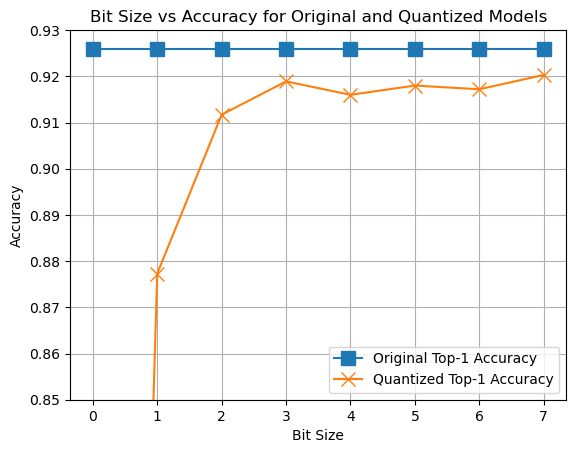

In [10]:
fig, ax = plt.subplots()

# Plotting with larger markers and adjusted axis limits
ax.plot(diff_b_sorted.index, diff_b_sorted['Original Top1 Accuracy'], label='Original Top-1 Accuracy', marker='s', markersize=10)
ax.plot(diff_b_sorted.index, diff_b_sorted['Quantized Top1 Accuracy'], label='Quantized Top-1 Accuracy', marker='x', markersize=10)

ax.set_xlabel('Bit Size')
ax.set_ylabel('Accuracy')
ax.set_title('Bit Size vs Accuracy for Original and Quantized Models')
ax.legend()

# Setting the Y-axis limits to zoom in on the part of the graph with more subtle differences
ax.set_ylim(0.85, 0.93)  # Adjust these values based on your specific data range
ax.grid(True)  # Adds grid lines for better readability
plt.savefig('../image/Bit_Size_2.png')
plt.show()

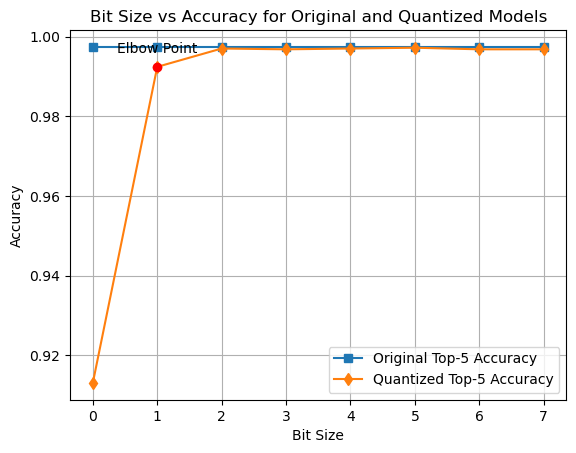

Elbow Point is at Bit Size: 1


In [11]:
# Plotting
fig, ax = plt.subplots()

ax.plot(diff_b_sorted.index, diff_b_sorted['Original Top5 Accuracy'], label='Original Top-5 Accuracy', marker='s')
ax.plot(diff_b_sorted.index, diff_b_sorted['Quantized Top5 Accuracy'], label='Quantized Top-5 Accuracy', marker='d')

# Using KneeLocator to find the elbow point
knee_locator = KneeLocator(diff_b_sorted.index, diff_b_sorted['Quantized Top5 Accuracy'], curve='concave', direction='increasing')
elbow_bit = knee_locator.knee

# Highlighting the elbow point if it exists for the Quantized accuracy
if elbow_bit:
    elbow_quantized_acc = diff_b_sorted.loc[diff_b_sorted.index == elbow_bit, 'Quantized Top5 Accuracy'].values[0]
    ax.plot(elbow_bit, elbow_quantized_acc, 'ro')  # Red circle marker for Quantized Accuracy
    ax.annotate('Elbow Point', (elbow_bit, elbow_quantized_acc), textcoords="offset points", xytext=(0,10), ha='center')

ax.set_xlabel('Bit Size')
ax.set_ylabel('Accuracy')
ax.set_title('Bit Size vs Accuracy for Original and Quantized Models')
ax.legend()
ax.grid(True)  # Adds grid lines for better readability
plt.savefig('../image/Bit_Size_3.png')
plt.show()

print("Elbow Point is at Bit Size:", elbow_bit)

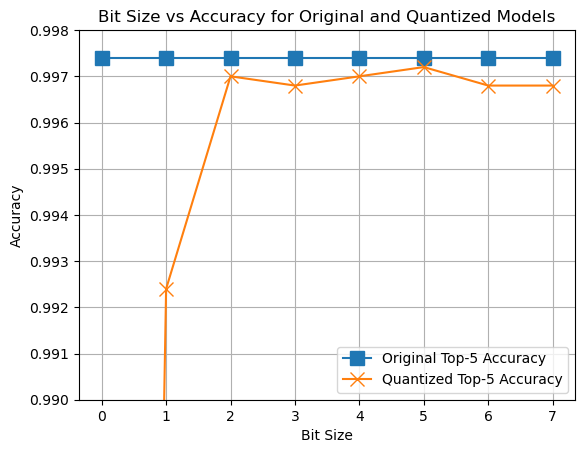

In [12]:
fig, ax = plt.subplots()

# Plotting with larger markers and adjusted axis limits
ax.plot(diff_b_sorted.index, diff_b_sorted['Original Top5 Accuracy'], label='Original Top-5 Accuracy', marker='s', markersize=10)
ax.plot(diff_b_sorted.index, diff_b_sorted['Quantized Top5 Accuracy'], label='Quantized Top-5 Accuracy', marker='x', markersize=10)

ax.set_xlabel('Bit Size')
ax.set_ylabel('Accuracy')
ax.set_title('Bit Size vs Accuracy for Original and Quantized Models')
ax.legend()

# Setting the Y-axis limits to zoom in on the part of the graph with more subtle differences
ax.set_ylim(0.99, 0.998)  # Adjust these values based on your specific data range
ax.grid(True)  # Adds grid lines for better readability
plt.savefig('../image/Bit_Size_4.png')
plt.show()